# 1. Imports

In [1]:
import os
import glob
import numpy as np
import pandas as pd
from datetime import timedelta, date
import matplotlib.pyplot as pl
%matplotlib inline
import itertools

# 2. Functions

## 2.1 Define epoch function

In [2]:
def datime2epoch(dt):
    """
    Thi is an example script.

    It seems that it has to have THIS docstring with a summary line, a blank line
    and sume more text like here. Wow.
    """
    # cast dt into string in case it isn't 
    dt = str(dt)
    if dt != 'summary':
        if str(dt) != 'nan':
            if '_' in dt:
                YYYY, mm, dd = dt.split('_')
            else:
                YYYY = dt[0:4]
                mm = dt[4:6]
                dd = dt[6:8]
            return (
                date(
                    int(YYYY),
                    int(mm),
                    int(dd)
                ) - date(1970 ,1, 1)
            ).total_seconds()
        else:
            return -1
    else:
        return -1

In [26]:
def datime2frac(dt):
    """
    This.

    Bla bla.
    """
    dt = str(dt)
    if dt != 'summary':
        if str(dt) != 'nan':
            if '_' in dt:
                YYYY, mm, dd = dt.split('_')
            else:
                YYYY = dt[0:4]
                mm = dt[4:6]
                dd = dt[6:8]
            return int(YYYY) + (int(mm) / float(12))
        else:
            return -1
    else:
        return -1

## 2.2 Get latest delegation file

In [3]:
def get_latest_delegation_file(
    rir, path_to_files = '../../data/processed/delegation_files/%s/asns'):
    path_to_rir_delegation_files = path_to_files % rir
    delegation_file_a = np.array(glob.glob(path_to_rir_delegation_files + '/*'))
    delegation_file_a = np.sort(delegation_file_a)
    return delegation_file_a[-1]

# 3. Load delegation files

## 3.1 Load LACNIC data

In [4]:
lacnic_latest_df = pd.read_csv(
    get_latest_delegation_file('lacnic'),
    names=[
        'rir',
        'cc',
        'resource',
        'asn',
        'void',
        'allocation_date',
        'status',
        'hash'
    ],
    sep='|'
)

In [5]:
# sort values
lacnic_latest_df = lacnic_latest_df.sort_values('allocation_date', ascending=True)
# Remove rows that do not contains ASNs
lacnic_latest_df = lacnic_latest_df.loc[
    lacnic_latest_df['asn'] != '*'
]
# Adds epoch column
lacnic_latest_df['epoch'] = lacnic_latest_df['allocation_date'].apply(datime2epoch)
# cast ASN to int to then use with BGP table dump data frame
lacnic_latest_df['asn'] = lacnic_latest_df['asn'].values.astype(int)

## 3.2 Load RIPE data

In [6]:
ripe_latest_df = pd.read_csv(
    get_latest_delegation_file('ripe'),
    names=[
        'rir',
        'cc',
        'resource',
        'asn',
        'void',
        'allocation_date',
        'status',
        'hash'
    ],
    sep='|'
)

In [7]:
# sort values
ripe_latest_df = ripe_latest_df.sort_values('allocation_date', ascending=True)
# Remove rows that do not contains ASNs
ripe_latest_df = ripe_latest_df.loc[
    ripe_latest_df['asn'] != '*'
]
# Adds epoch column
ripe_latest_df['epoch'] = ripe_latest_df['allocation_date'].apply(datime2epoch)
# cast ASN to int to then use with BGP table dump data frame
ripe_latest_df['asn'] = ripe_latest_df['asn'].values.astype(int)

## 3.3 Load APNIC data

In [8]:
apnic_latest_df = pd.read_csv(
    get_latest_delegation_file('apnic'),
    names=[
        'rir',
        'cc',
        'resource',
        'asn',
        'void',
        'allocation_date',
        'status',
        'hash'
    ],
    sep='|'
)

In [9]:
# sort values
apnic_latest_df = apnic_latest_df.sort_values('allocation_date', ascending=True)
# Remove rows that do not contains ASNs
apnic_latest_df = apnic_latest_df.loc[
    apnic_latest_df['asn'] != '*'
]
# Adds epoch column
apnic_latest_df['epoch'] = apnic_latest_df['allocation_date'].apply(datime2epoch)
# cast ASN to int to then use with BGP table dump data frame
apnic_latest_df['asn'] = apnic_latest_df['asn'].values.astype(int)

## 3.4 Load AFRINIC data

In [10]:
afrinic_latest_df = pd.read_csv(
    get_latest_delegation_file('afrinic'),
    names=[
        'rir',
        'cc',
        'resource',
        'asn',
        'void',
        'allocation_date',
        'status',
        'hash'
    ],
    sep='|'
)

In [11]:
# sort values
afrinic_latest_df = afrinic_latest_df.sort_values('allocation_date', ascending=True)
# Remove rows that do not contains ASNs
afrinic_latest_df = afrinic_latest_df.loc[
    afrinic_latest_df['asn'] != '*'
]
# Adds epoch column
afrinic_latest_df['epoch'] = afrinic_latest_df['allocation_date'].apply(datime2epoch)
# cast ASN to int to then use with BGP table dump data frame
afrinic_latest_df['asn'] = afrinic_latest_df['asn'].values.astype(int)

## 3.5 Load ARIN dat

In [12]:
arin_latest_df = pd.read_csv(
    get_latest_delegation_file('arin'),
    names=[
        'rir',
        'cc',
        'resource',
        'asn',
        'void',
        'allocation_date',
        'status',
        'hash'
    ],
    sep='|'
)

In [13]:
# sort values
arin_latest_df = arin_latest_df.sort_values('allocation_date', ascending=True)
# Remove rows that do not contain ASNs
arin_latest_df = arin_latest_df.loc[
    arin_latest_df['asn'] != '*'
]
# Remove rows that contains NaN
arin_latest_df = arin_latest_df.loc[
    arin_latest_df['allocation_date'].notnull()
]
# Remove entries before EPOCH initiates
arin_latest_df['allocation_date'] = arin_latest_df['allocation_date'].values.astype(int)
arin_latest_df = arin_latest_df.loc[
    arin_latest_df['allocation_date'] > 19700101
]
# Adds epoch column
arin_latest_df['epoch'] = arin_latest_df['allocation_date'].apply(datime2epoch)
# cast ASN to int to then use with BGP table dump data frame
arin_latest_df['asn'] = arin_latest_df['asn'].values.astype(int)

## 3.6 Concatenate

In [14]:
delegation_df = pd.concat(
    [
        arin_latest_df,
        apnic_latest_df,
        afrinic_latest_df,
        ripe_latest_df,
        lacnic_latest_df
    ]
)

# 5. Get visible ASes from RIBs

In [15]:
def get_visible_ases(bgp_table_dump_df, ixp_asn):
    """
    Thi is an example script.

    It seems that it has to have THIS docstring with a summary line, a blank line
    and sume more text like here. Wow.
    """
    # create set of IXP members
    members_set = set()
    # Loop
    for as_path_str in bgp_table_dump_df.drop_duplicates(
        'as-path')['as-path'].values:
        as_path_list = as_path_str.split(',')
        # if AS-PATH contains more than one AS
        # If not, the IXP member is directly annoucing 
        # its routes to the monitor
        if len(as_path_list) > 1:
            # Removes path through HE (AS6939 from the path)
            if int(as_path_list[0]) != 6939 and int(as_path_list[1]) != 6939:
            # Checks if the route server is the once announcing the path
            # If so, remove IXP ASN from path
            # If not, it is direct member
                if int(as_path_list[0]) == ixp_asn:
                    init_val = 1
                else:
                    init_val = 0
                for i in range(1, len(as_path_list)):
                        members_set.add(int(as_path_list[i]))
        else:
            members_set.add(int(as_path_str))
    return members_set

In [16]:
ixp_under_analysis_list = [
    # Frankfurt (DE-CIX)
    'fra',
    # Paris (Frace-IX)
    'cdg',
    # Bangkok (BNKIX)
    'bkk',
    # Johanesburg (JINX)
    'jnb',
    # IX.br Sao Paulo
    'saopaulo',
    # CABASE-BUE
    'eze',
    # PIT Chile
    'scl'
]

In [17]:
ixp_rir_dict = {
    # Frankfurt (DE-CIX)
    'fra': 'ripe',
    # Paris (Frace-IX)
    'cdg': 'ripe',
    # Bangkok (BNKIX)
    'bkk': 'apnic',
    # Johanesburg (JINX)
    'jnb': 'afrinic',
    # IX.br Sao Paulo
    'saopaulo': 'lacnic',
    # CABASE-BUE
    'eze': 'lacnic',
    # PIT Chile
    'scl': 'lacnic'
}

In [18]:
ixp_cc_dict = {
    # Frankfurt (DE-CIX)
    'fra': 'DE',
    # Paris (Frace-IX)
    'cdg': 'FR',
    # Bangkok (BNKIX)
    'bkk': 'TH',
    # Johanesburg (JINX)
    'jnb': 'ZA',
    # IX.br Sao Paulo
    'saopaulo': 'BR',
    # CABASE-BUE
    'eze': 'AR',
    # PIT Chile
    'scl': 'CL'
}

In [19]:
ixp_asn_dict = {
    'eze': 11058,
    'scl': 61522,
    # We do not care about this now
    'fra': None,
    # We do not care about this now
    'cdg': None,
    # We do not care about this now
    'bkk': None,
    # We do not care about this now
    'jnb': None,
    # We do not care about this now
    'saopaulo': None,
}

In [20]:
path_to_ixp_bgp_dumps_dirs = '../../data/processed/ribs/v4'

**MAIN BLOCK OF THIS NOTEBOOK**

In [21]:
# create output data frame
visible_ases_df = pd.DataFrame(
    [], 
    columns=['iata_code', 'date', 'asn']
)
# Iterates over the IXPs under analysis
for ixp in ixp_under_analysis_list:
    # get all BGP table dumps
    ixp_bgp_table_dump_files_a = np.array(glob.glob(path_to_ixp_bgp_dumps_dirs + '/' + ixp + '/*'))
    # sort BGP table dumps by ASCENDING DATE
    ixp_bgp_table_dump_files_a = np.sort(ixp_bgp_table_dump_files_a)
    # Loop over each BGP table dump (month-to-month analysis)
    for bgp_table_dump_file in ixp_bgp_table_dump_files_a:
        # get snapshot's date --> DATETIME
        date_datetime = datime2epoch(bgp_table_dump_file.split('/')[-1])
        # get snapshot's date --> STR WITHOUT _
        date_no_spaces_str = bgp_table_dump_file.split('/')[-1].replace('_','')
        # get snapshot's date --> STR 
        date_str = bgp_table_dump_file.split('/')[-1]
        # open pre-processed bgp table dump
        bgp_table_dump_df = pd.read_csv(
            bgp_table_dump_file,
            header='infer',
            sep=','
        )
        # Remove NaN path if exists
        bgp_table_dump_df = bgp_table_dump_df.loc[
            bgp_table_dump_df['as-path'].notnull()
        ]
        # find visible ASes from BGP table dump
        members_set = get_visible_ases(bgp_table_dump_df, ixp_asn_dict[ixp])
        # create DF with members' set
        tmp_df = pd.DataFrame(
            {
                'iata_code': np.repeat(ixp, len(members_set)),
                'date': np.repeat(date_str, len(members_set)),
                'asn': list(members_set)
            },
            columns=['iata_code', 'date', 'asn']
        )
        visible_ases_df = pd.DataFrame.append(visible_ases_df, tmp_df)
# join members' set and delegation files
visible_ases_df = visible_ases_df.join(
    delegation_df[['asn','cc']].set_index('asn'),
    on='asn',
    how='left',
    lsuffix='_left',
    rsuffix='_right'
)

# 6. Analysis

## 6.1 Number of nationalities seen at the IXP

In [29]:
# Count number of countries per IXP
count_df = visible_ases_df.drop_duplicates(
    ['iata_code', 'date', 'cc']
).groupby(['iata_code', 'date'])['cc'].count().reset_index()
# Rename columns
count_df = count_df.rename(columns={'cc': 'cnt'})
# Turns str(dates) into epochs
count_df['epoch'] = count_df['date'].apply(datime2epoch)
# Add another time column
count_df['t_frac'] = count_df['date'].apply(datime2frac)

In [30]:
count_df.head()

,iata_code,date,cnt,epoch,t_frac
0,bkk,2018_02_01,10,1.517443e+09,2018.166667
1,bkk,2018_03_01,10,1.519862e+09,2018.250000
2,bkk,2018_04_01,13,1.522541e+09,2018.333333
3,bkk,2018_05_01,13,1.525133e+09,2018.416667
4,bkk,2018_06_01,13,1.527811e+09,2018.500000


In [53]:
date_str = '2018_07_01'
count_df.loc[
    count_df['date'] == date_str
].sort_values('cnt')

,iata_code,date,cnt,epoch,t_frac
5,bkk,2018_07_01,14,1.530403e+09,2018.583333
517,scl,2018_07_01,17,1.530403e+09,2018.583333
217,eze,2018_07_01,19,1.530403e+09,2018.583333
391,jnb,2018_07_01,45,1.530403e+09,2018.583333
114,cdg,2018_07_01,140,1.530403e+09,2018.583333
323,fra,2018_07_01,226,1.530403e+09,2018.583333


## 6.2 ASes nationality prevalence seen at the IXP

In [33]:
# Count number of ASes per country at each IXP
frac_df = visible_ases_df.groupby(
    ['iata_code', 'date', 'cc']
).count().reset_index()
# Count TOTAL number of ASes at each IXP
sum_df = frac_df.groupby(
    ['iata_code', 'date']
)['asn'].sum().reset_index()
# renaming cols
sum_df = sum_df.rename(columns={'asn': 'total'})
# renaming cols
frac_df = frac_df.rename(columns={'asn': 'per_country'})
# Join both DF to create the fraction
frac_df = frac_df.join(
    sum_df.set_index(['iata_code', 'date']),
    on=(['iata_code', 'date']),
    how='left',
    lsuffix='_left',
    rsuffix='_right'
)
# compute fraction
frac_df['frac'] = frac_df['per_country'] / frac_df['total'].values.astype(float)
# Turns str(dates) into epochs
frac_df['epoch'] = frac_df['date'].apply(datime2epoch)
# Add another time column
frac_df['t_frac'] = frac_df['date'].apply(datime2frac)

In [34]:
frac_df.head()

,iata_code,date,cc,per_country,total,frac,epoch,t_frac
0,bkk,2018_02_01,AU,1,214,0.004673,1.517443e+09,2018.166667
1,bkk,2018_02_01,EU,1,214,0.004673,1.517443e+09,2018.166667
2,bkk,2018_02_01,GB,1,214,0.004673,1.517443e+09,2018.166667
3,bkk,2018_02_01,HK,1,214,0.004673,1.517443e+09,2018.166667
4,bkk,2018_02_01,ID,1,214,0.004673,1.517443e+09,2018.166667


In [49]:
def plot_frac(df, countries_list, iata_code, ax1):
    """
    This.

    Bla bla.
    """
    ax1.yaxis.grid(True, linestyle='-', color='#bababa',alpha=0.5)
    bar_width = 1 / float(12)
    for i in range(len(countries_list)):
        if i > 0:
            plot = ax1.bar(
                df.loc[df['cc'] == countries_list[i]]['t_frac'],
                df.loc[df['cc'] == countries_list[i]]['frac'],
                width=bar_width,
                alpha=0.5,
                label=countries_list[i],
                bottom=df.loc[
                    (
                        df['cc'].isin(countries_list[:i])
                    ) 
                    & 
                    (
                        df['t_frac'].isin(
                            df.loc[
                                df['cc'] == countries_list[i]
                            ]['t_frac'].values
                        )
                    )
                ].groupby('date')['frac'].sum().reset_index()['frac'].values,
                color=pl.cm.jet((i) / float(len(list(countries_list)) - 1))
            )
        else:
            plot = ax1.bar(
                df.loc[
                    df['cc'] == countries_list[i]
                ]['t_frac'].values,
                df.loc[
                    df['cc'] == countries_list[i]
                ]['frac'].values,
                width=bar_width,
                alpha=0.5,
                label=countries_list[i],
                color=pl.cm.jet((i) / float(len(list(countries_list)) - 1))
            )
    ticks = []
    xlabels = []
    for index, row in df.drop_duplicates('date').iterrows():
        dt_datetime = str(row['date'])
        if (dt_datetime[-5:] == '01_01') or (dt_datetime[-5:] == '01_10'):
            if int(dt_datetime[:4]) % 2 == 0:
                ticks.append(row['t_frac'])
                xlabels.append(dt_datetime[0:4])
            else:
                ticks.append(row['t_frac'])
                xlabels.append('')
    ax1.set_xticks(ticks, minor=False)
    ax1.set_xticklabels(xlabels, rotation=0, minor=False, ha='center')
    ax1.set_yticks(np.arange(0, 1.01, 0.25), minor=False)
    ax1.set_ylabel('fraction', fontsize=35)
    ax1.set_xlabel('', fontsize=25)
    ax1.tick_params(labelsize=40)
    ax1.legend(
        loc='lower center',
        ncol=5,
        frameon=True,
        fontsize=35,
        columnspacing= 1,
        handletextpad= 0.1,
        markerscale=0.5
    )
    ax1.axis(
        [
            df.loc[
                df['cc'].isin(countries_list)
            ]['t_frac'].min(),
            df.loc[
                df['cc'].isin(countries_list)
            ]['t_frac'].max(),
            0,
            1
        ]
    )

bkk
cdg
eze
fra
jnb
saopaulo
scl


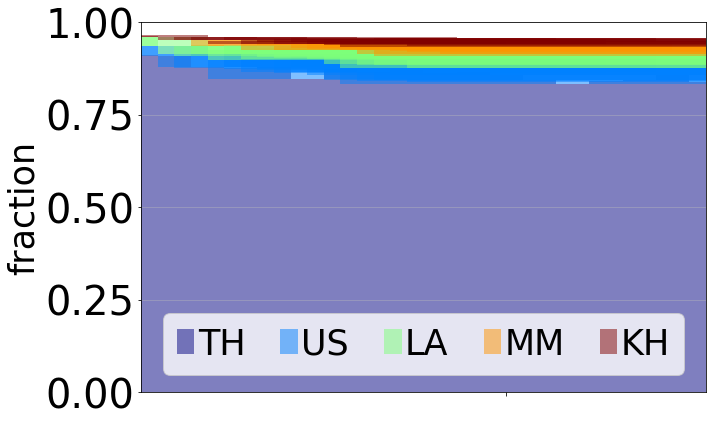

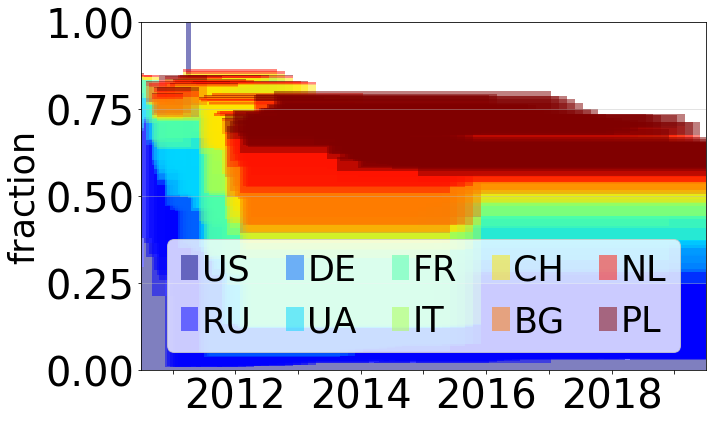

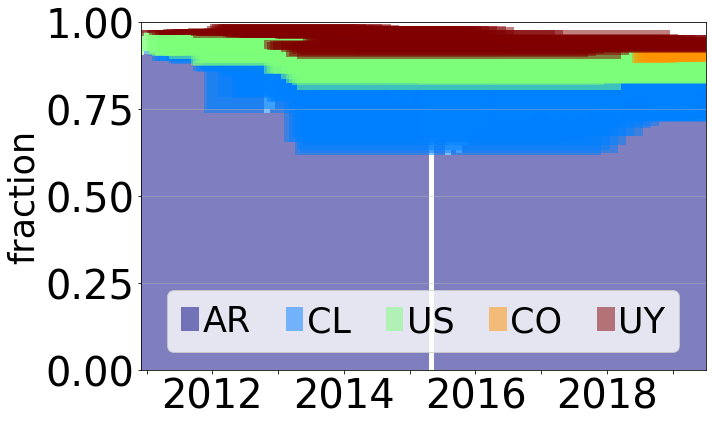

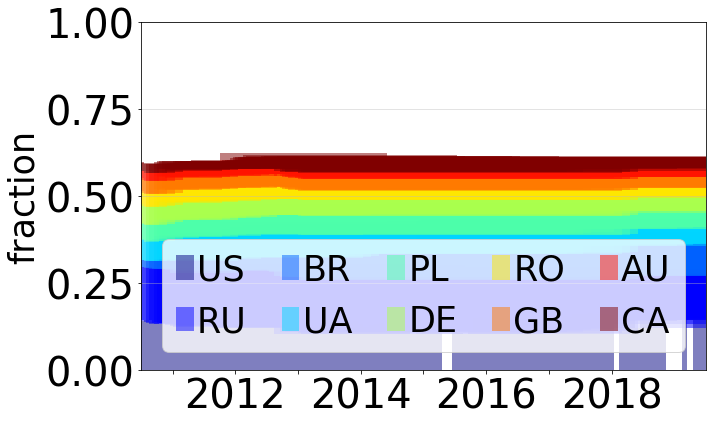

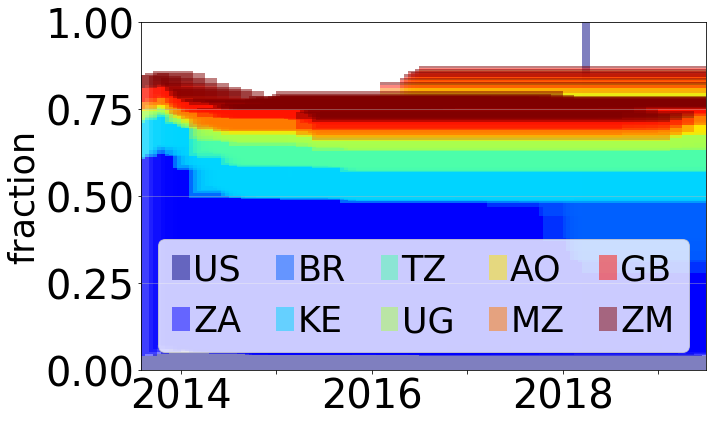

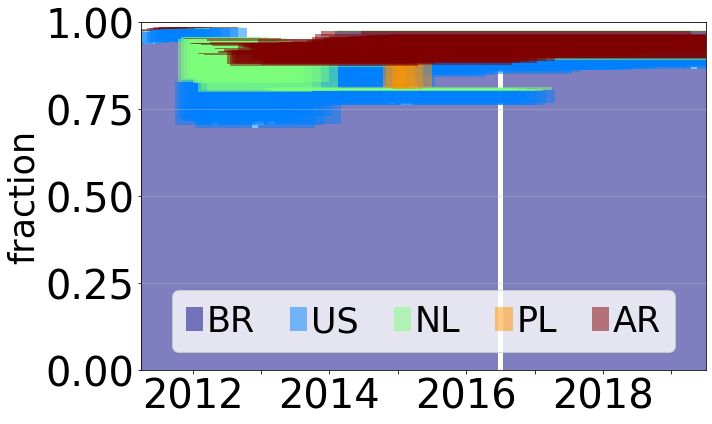

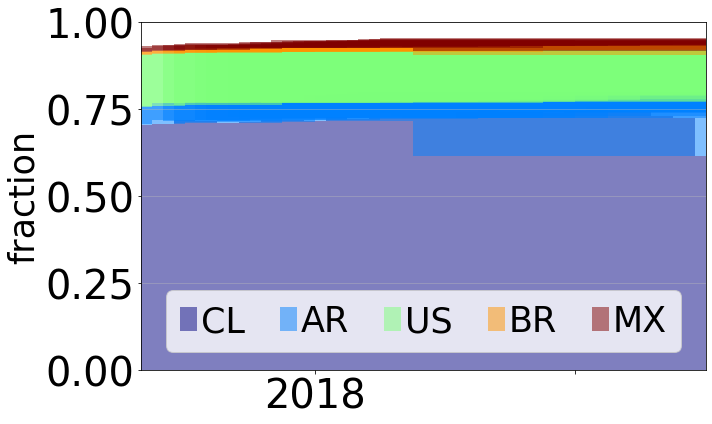

In [50]:
params = {'legend.handlelength': 0.5}
pl.rcParams.update(params)
# plot_count(count_df, iata_code, ax1)
for iata_code in frac_df.drop_duplicates('iata_code')['iata_code'].values:
    if iata_code in ('cdg', 'gru', 'fra', 'jnb'):
        threshold = 10
    else:
        threshold = 5
    # just picking up the most prevalent nationalities
    top_countries_a = frac_df.loc[
        frac_df['iata_code'] == iata_code
    ].sort_values(
        ['frac', 'cc']
    ).drop_duplicates(
        'cc', keep="last"
    ).tail(threshold)['cc'].values
    #
    print(iata_code)
    # PLOT
    fig, ax1 = pl.subplots(1, figsize=(10, 6))
    plot_frac(
        frac_df.loc[
            frac_df['iata_code'] == iata_code
        ],
        top_countries_a[::-1],
        iata_code, 
        ax1
    )
    fig.subplots_adjust(hspace=0)
    fig.tight_layout()
#     fig.savefig('../../figures/6_%s.pdf' % iata_code)

## 6.3 US prevalence

In [60]:
date_str = '2018_07_01'
ar_a = visible_ases_df.loc[
    (visible_ases_df['iata_code'] == 'eze') &
    (visible_ases_df['cc'] == 'US') &
    (visible_ases_df['date'].str.startswith(date_str[:-3]))
]['asn'].values.astype(int)
cl_a = visible_ases_df.loc[
    (visible_ases_df['iata_code'] == 'scl') &
    (visible_ases_df['cc'] == 'US') &
    (visible_ases_df['date'].str.startswith(date_str[:-3]))
]['asn'].values.astype(int)
br_a = visible_ases_df.loc[
    (visible_ases_df['iata_code'] == 'saopaulo') &
    (visible_ases_df['cc'] == 'US') &
    (visible_ases_df['date'].str.startswith(date_str[:-3]))
]['asn'].values.astype(int)
print(
    np.intersect1d(
        cl_a,
        np.intersect1d(ar_a, br_a)
    )
)

[  2906   3549   6507  10753  13335  13729  14551  15169  16921  18747
  20144  26415  32590  32934  36040  36384  36492  54113  54115  55259
 394725 395973]
